In [1]:
#MNIST CLASSIFIER


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])


# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train
model.fit(X_train, y_train,
          epochs=20,               # Increase epochs, early stopping will stop it when needed
          batch_size=32,
          validation_split=0.2,
          callbacks=[early_stop])

# Evaluate
model.evaluate(X_test, y_test)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8315 - loss: 0.5608 - val_accuracy: 0.9568 - val_loss: 0.1381
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9369 - loss: 0.2035 - val_accuracy: 0.9670 - val_loss: 0.1089
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9496 - loss: 0.1604 - val_accuracy: 0.9709 - val_loss: 0.0951
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9548 - loss: 0.1429 - val_accuracy: 0.9722 - val_loss: 0.0907
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9621 - loss: 0.1247 - val_accuracy: 0.9733 - val_loss: 0.0841
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9638 - loss: 0.1177 - val_accuracy: 0.9737 - val_loss: 0.0881
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9668 - loss: 0.1054 - val_accuracy: 0.9762 - val_loss: 0.0790
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9679 -

[0.0665033757686615, 0.9786999821662903]

In [11]:
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


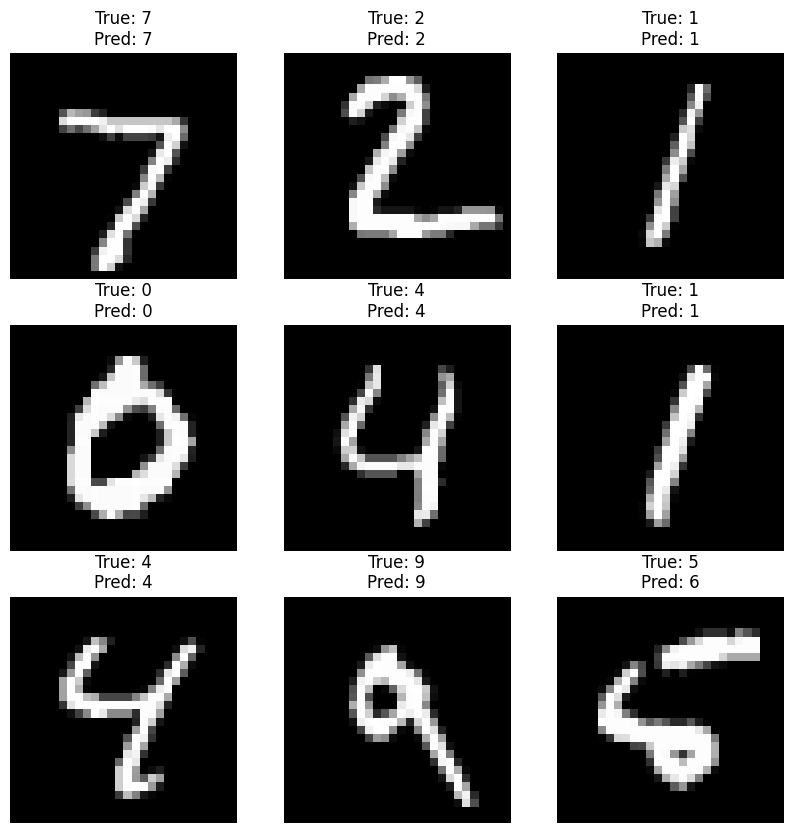

In [12]:
import numpy as np
import matplotlib.pyplot as plt
pred_probs=model.predict(X_test)
pred_labels=np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap="grey")
    plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
    plt.axis('off')
plt.show()




In [13]:
# Train the model and store the history
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9709 - loss: 0.0894 - val_accuracy: 0.9758 - val_loss: 0.0782
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9748 - loss: 0.0778 - val_accuracy: 0.9787 - val_loss: 0.0773
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9751 - loss: 0.0768 - val_accuracy: 0.9803 - val_loss: 0.0696
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9765 - loss: 0.0713 - val_accuracy: 0.9790 - val_loss: 0.0758
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9774 - loss: 0.0716 - val_accuracy: 0.9801 - val_loss: 0.0693


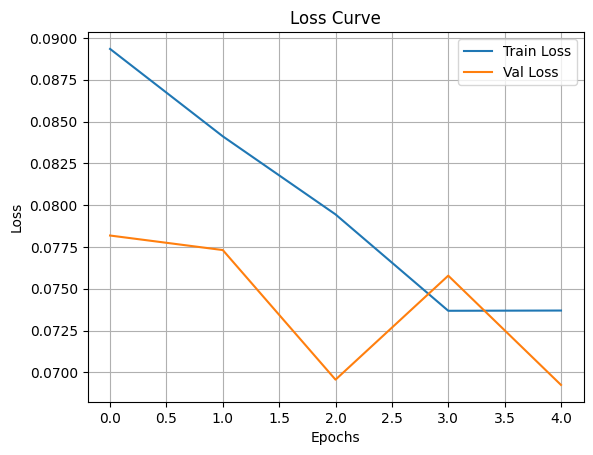

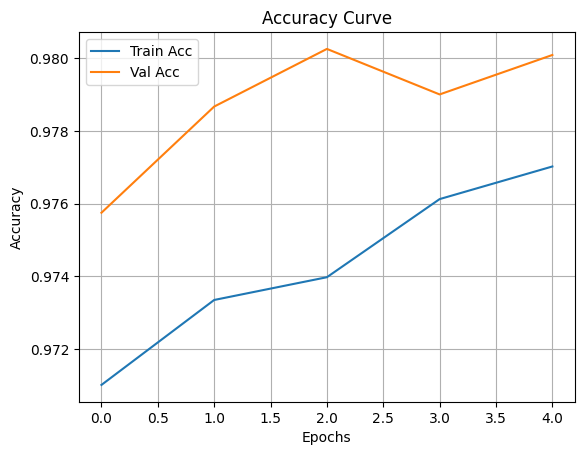

In [14]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()
